## 1. Importing essential libraries for EDA

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Import the CSV Data as pandas Dataframe

In [4]:
df = pd.read_csv("/home/shreya/work/mlproject/StudentPerformanceAnalysis/notebooks/data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 3. Data Cleaning

**3.1 Check Missing Values**

In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Observation - There are no missing values in the given dataset.

**3.2 Check Duplicates**

In [6]:
df.duplicated().sum()

0

Observation: There are no duplicate values in the given dataset.

**3.3 Check Data Types**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Observation: Among the 8 columns (features), 3 are of integer type and the rest of the features are of object type.

**3.4 Check unique values in each column**

In [8]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

Observation:
1. There are 2 unique values in three columns which are gender, lunch and test preparation courses.
2. There are 5 unique values in column - race/ethnicity.
3. There are 6 unique values in column - parental level of education.
4. There are 81 unique values in column - math score.
5. There are 72 unique values in column - reading score.
6. There are 77 unique values in column - writing score.


**3.5 Statistical Analysis of the Dataset**

In [9]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Observation:
From the above description of numerical data in the dataset, the observations are given as follows:
1. All mean values are very close to each other - between 66 and 68.05;
2. All standard deviations are also close - between 14.6 and 15.19;
3. While there is a minimum score 0 for math; minimum value is much higher for writing - 10 and for reading, minimum value is higher - 17.

**3.7 Exploring Data**

In [10]:
# Categories in 'gender' feature
print(f"Categories in 'gender' feature are {df['gender'].unique()}")

# Categories in 'race/ethnicity' feature
print(f"\nCategories in feature 'race/ethnicity' are {df['race/ethnicity'].unique()}")

# Categories in 'parental level of education' feature
print(f"\nCategories in feature 'parental level of education' are {df['parental level of education'].unique()}")

# Categories in 'lunch' feature
print(f"\nCategories in feature 'lunch' are {df['lunch'].unique()}")

# Categories in 'test preparation' feature
print(f"\nCategories in feature 'test preparation course' are {df['test preparation course'].unique()}")

Categories in 'gender' feature are ['female' 'male']

Categories in feature 'race/ethnicity' are ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in feature 'parental level of education' are ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in feature 'lunch' are ['standard' 'free/reduced']

Categories in feature 'test preparation course' are ['none' 'completed']


In [11]:
# Define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print numeric feature columns and categorical feature columns
print("The given data set has:")
print(f"  - {len(numeric_features)} numerical features: {numeric_features}")
print(f"  - {len(categorical_features)} categorical features: {categorical_features}")

The given data set has:
  - 3 numerical features: ['math score', 'reading score', 'writing score']
  - 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


**3.8 Adding two new columns - *Total Score* and *Average***

In [12]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / len(numeric_features)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()  
math_full = df[df['math score'] == 100]['average'].count()

print(f"Number of students having full marks in Subject :\n")
print(f"  - Maths are {math_full}")
print(f"  - Writing are {writing_full}")
print(f"  - Reading are {reading_full}")

Number of students having full marks in Subject :

  - Maths are 7
  - Writing are 14
  - Reading are 17


In [14]:
reading_less_than_20 = df[df['writing score'] <= 20]['average'].count()
writing_less_than_20 = df[df['reading score'] <= 20]['average'].count()
math_less_than_20 = df[df['math score'] <= 20]['average'].count()

print(f"Number of students having marks less than 20 in Subject:\n")
print(f"  - Maths are {math_full}")
print(f"  - Writing are {writing_full}")
print(f"  - Reading are {reading_full}")

Number of students having marks less than 20 in Subject:

  - Maths are 7
  - Writing are 14
  - Reading are 17


Observations:
From the above obtained vaues, we have observed that:
1. Students performed worst in Maths,
2. Students performed best in the reading section.

## 4. Visualization

**4.1 Visualize average score distribution to make some conclusion**

Using below techniques for the visualization: 
1. Histogram
2. Kernel Distribution Estimation (KDE)

4.1.1 Histogram & KDE

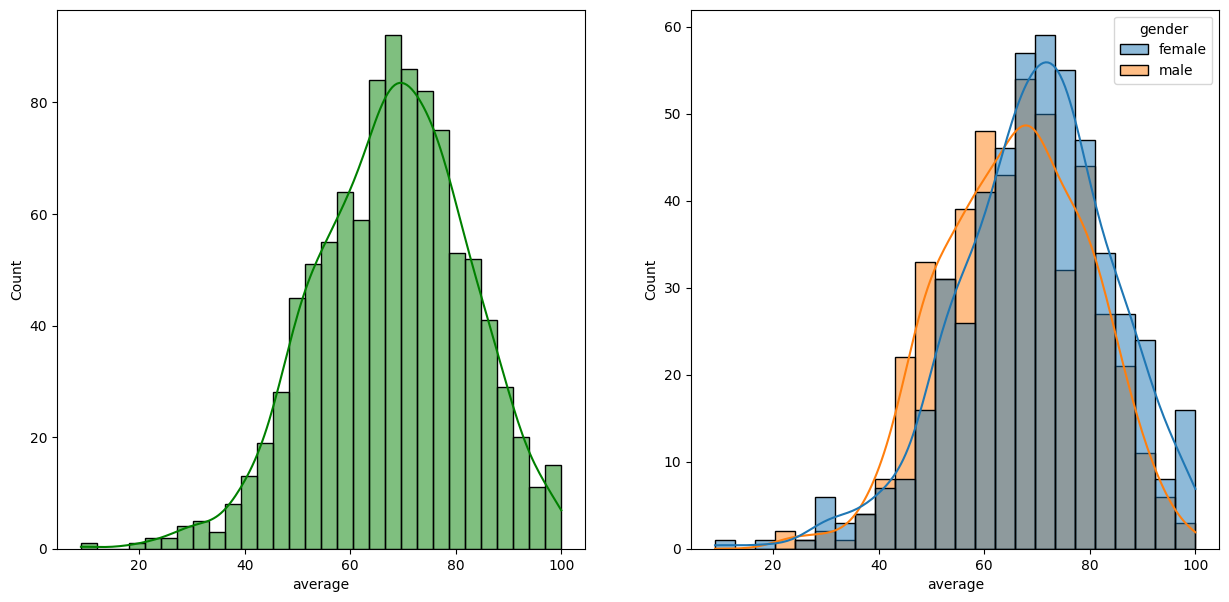

In [15]:
figs, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

Insights:
Female students tend to perform better than male students.

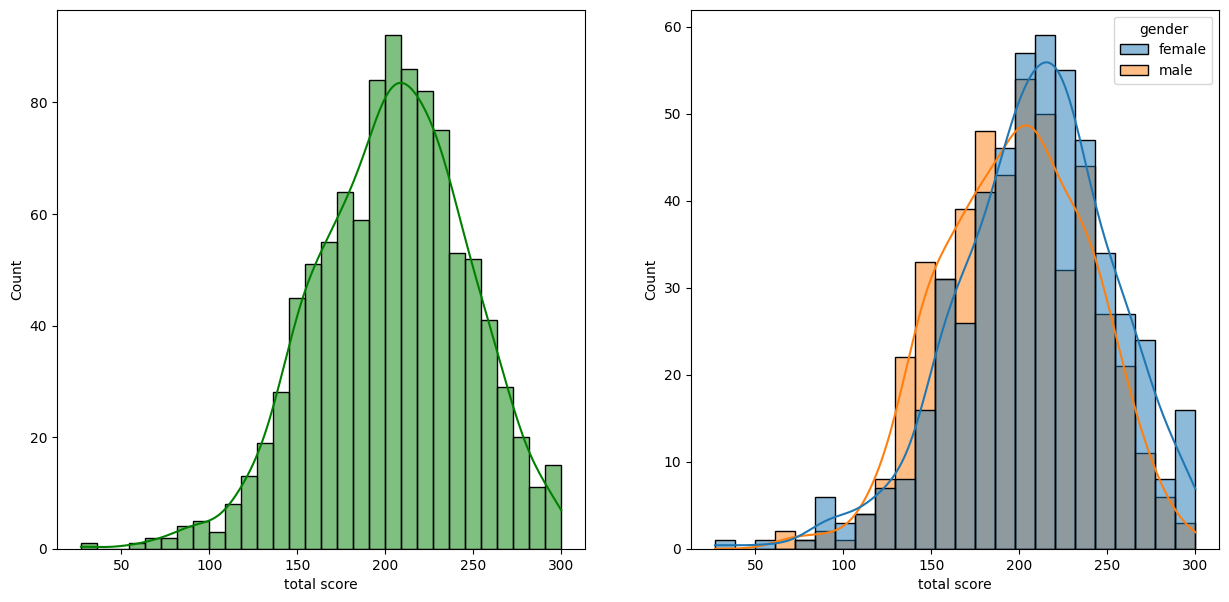

In [16]:
figs, axes = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

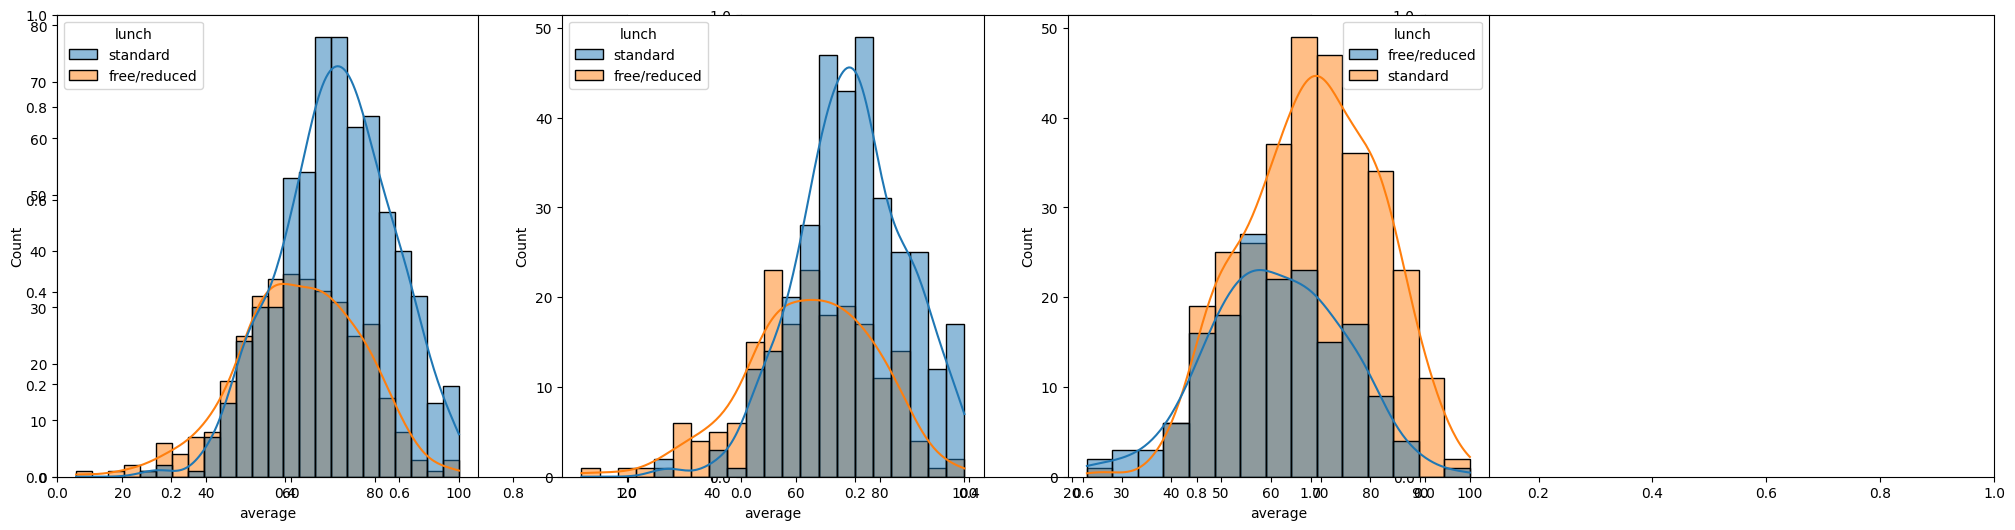

In [17]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='lunch')
plt.show()

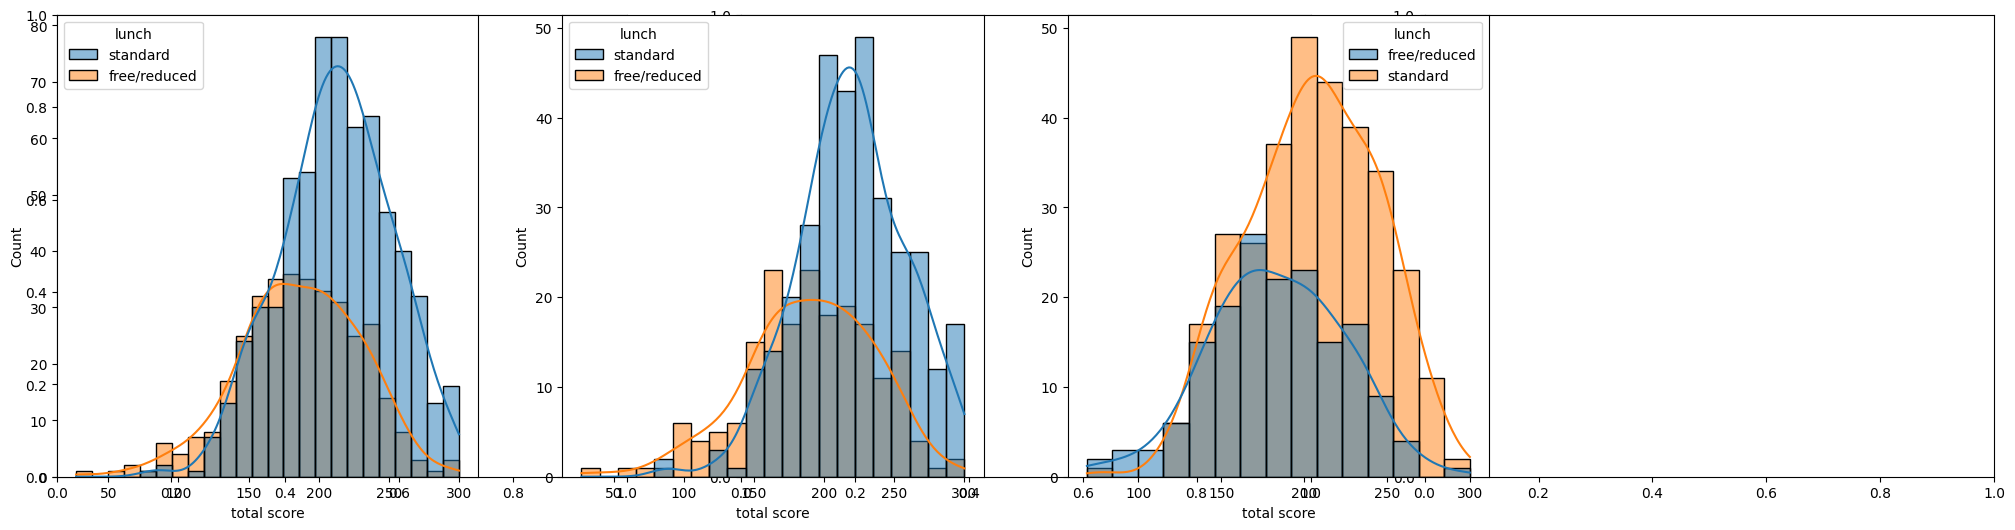

In [18]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
sns.histplot(data=df, x='total score', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df['gender']=='female'], x='total score', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df['gender']=='male'], x='total score', kde=True, hue='lunch')
plt.show()

Insights: 
1. Standard lunch helped students to achieve better scores.
2. Standard lunch helped students to perform well in exams whether the student is male or female.

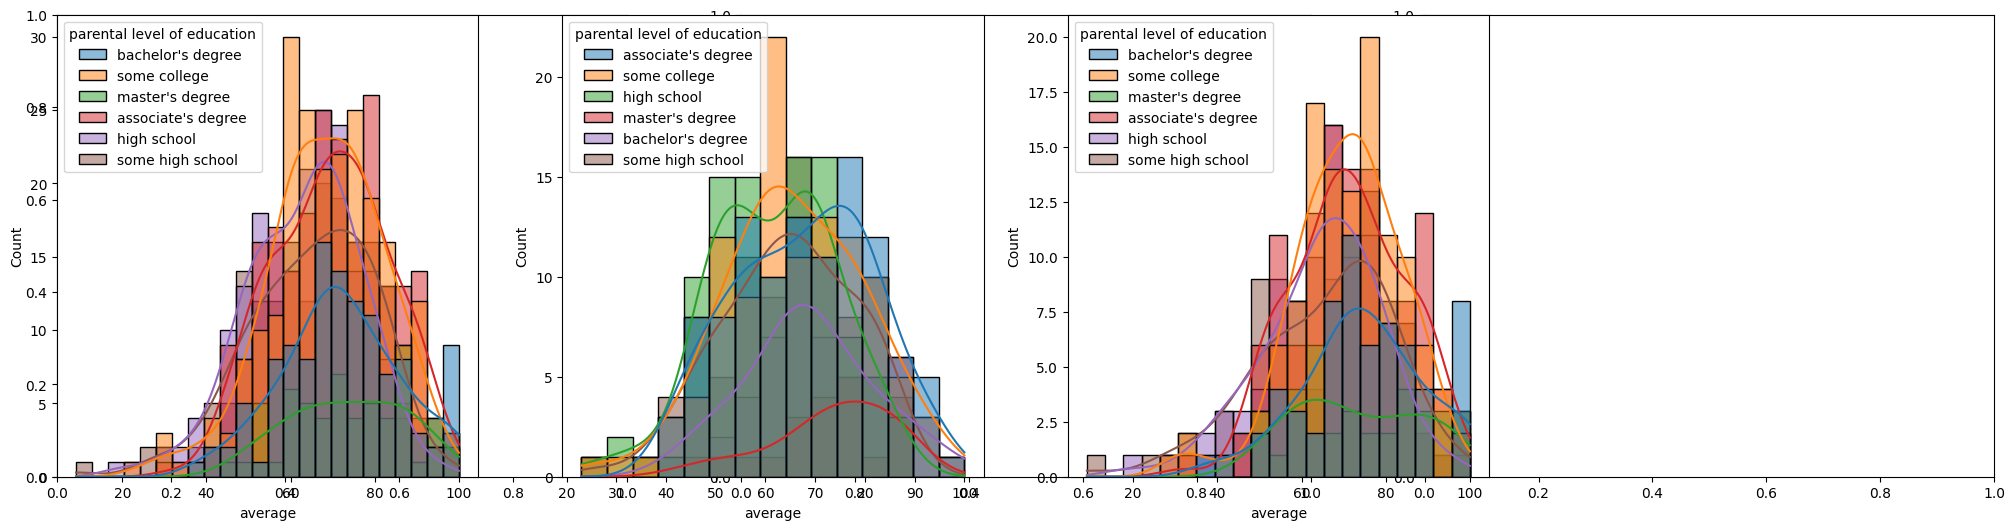

In [19]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='parental level of education')
plt.subplot(143)
ax = sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='parental level of education')
plt.show()

Insights: 
1. In general, Parent's education don't help student perform well in exam.
2. Second plot shows that the male students tend to perform well in exams whose parents have Associate's Degree or Master,s degree.
3. Third plot shows that there is no effect of parent's education on female students.

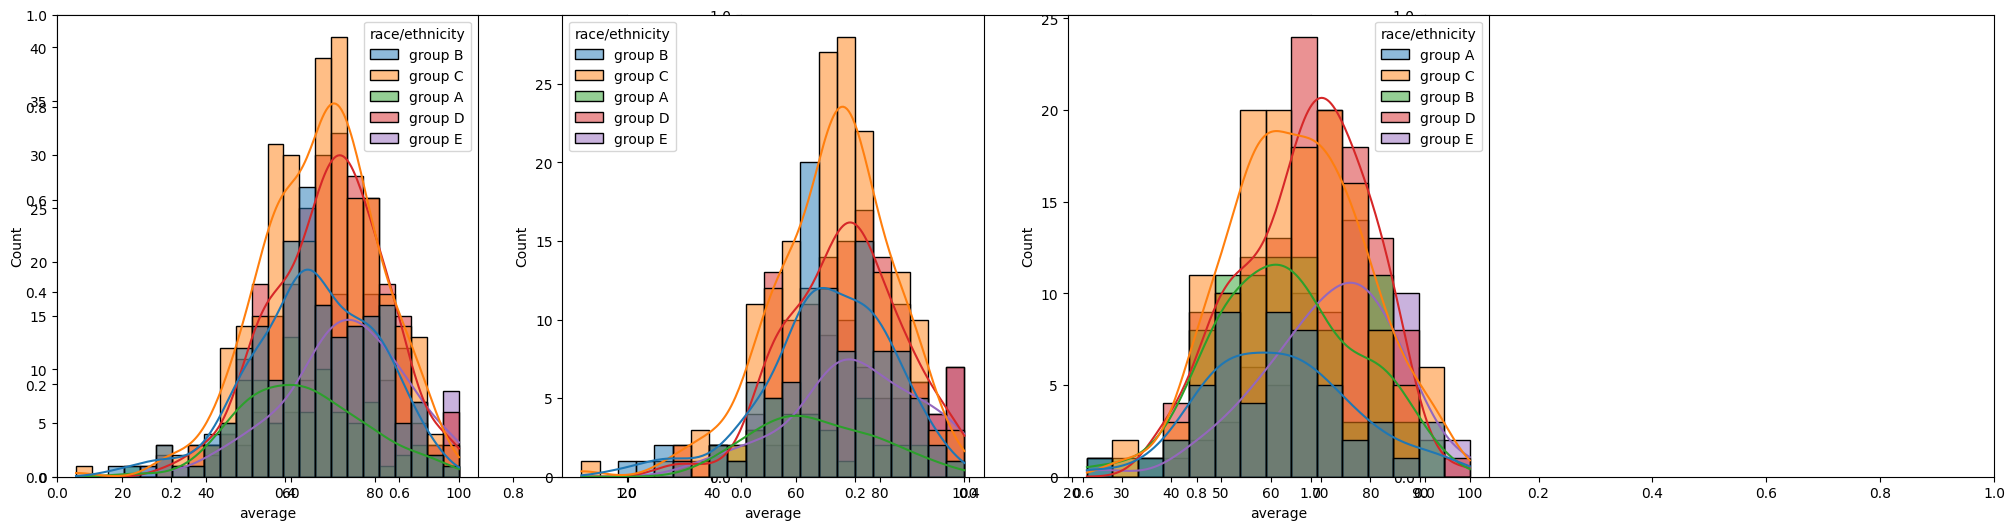

In [20]:
plt.subplots(1, 3, figsize=(25, 6))
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.subplot(142)
ax = sns.histplot(data=df[df['gender']=='female'], x='average', kde=True, hue='race/ethnicity')
plt.subplot(143)
ax = sns.histplot(data=df[df['gender']=='male'], x='average', kde=True, hue='race/ethnicity')
plt.show()

Insights:
1. Students of group A and group B tends to perform poorly in exams.
2. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

**4.2 Maximum score of students in all three subjects**

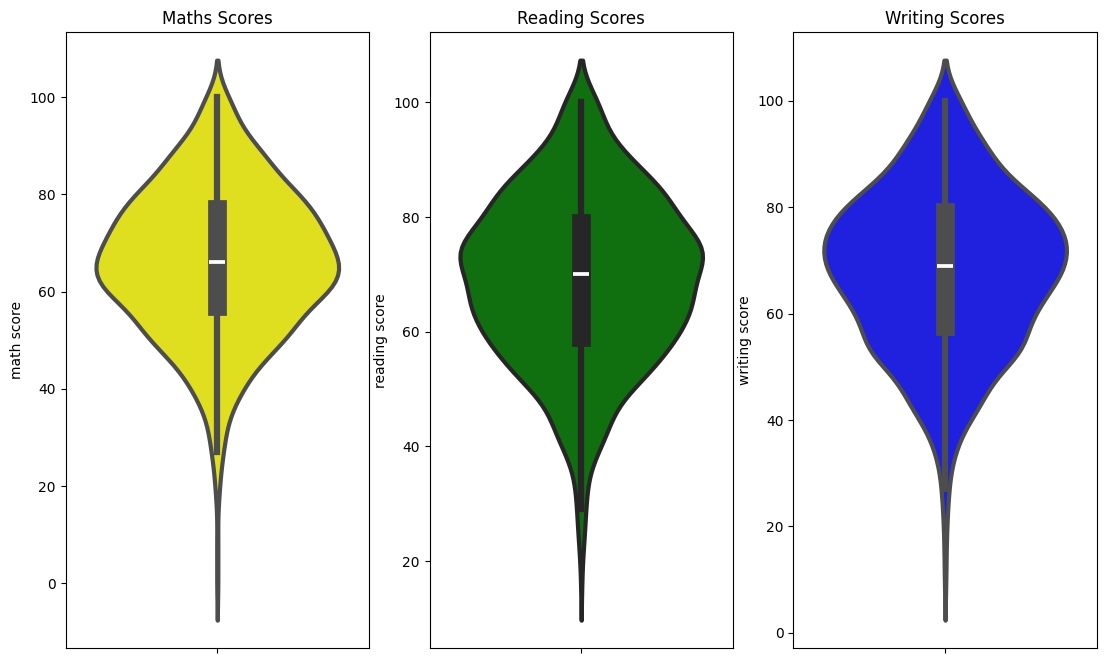

In [21]:
plt.figure(figsize=(18, 8))
plt.subplot(1, 4, 1)
plt.title('Maths Scores')
sns.violinplot(y='math score', data=df, color='yellow', linewidth=3)
plt.subplot(1, 4, 2)
plt.title('Reading Scores')
sns.violinplot(y='reading score', data=df, color='green', linewidth=3)
plt.subplot(1, 4, 3)
plt.title('Writing Scores')
sns.violinplot(y='writing score', data=df, color='blue', linewidth=3)
plt.show()

Insights:
It has been observed from the above three plots that most of the students score in between 60-80 in Maths whereas in reading and writing most of the students scored between 50 and 80.

**4.3 Multivariate Analysis using pie chart**

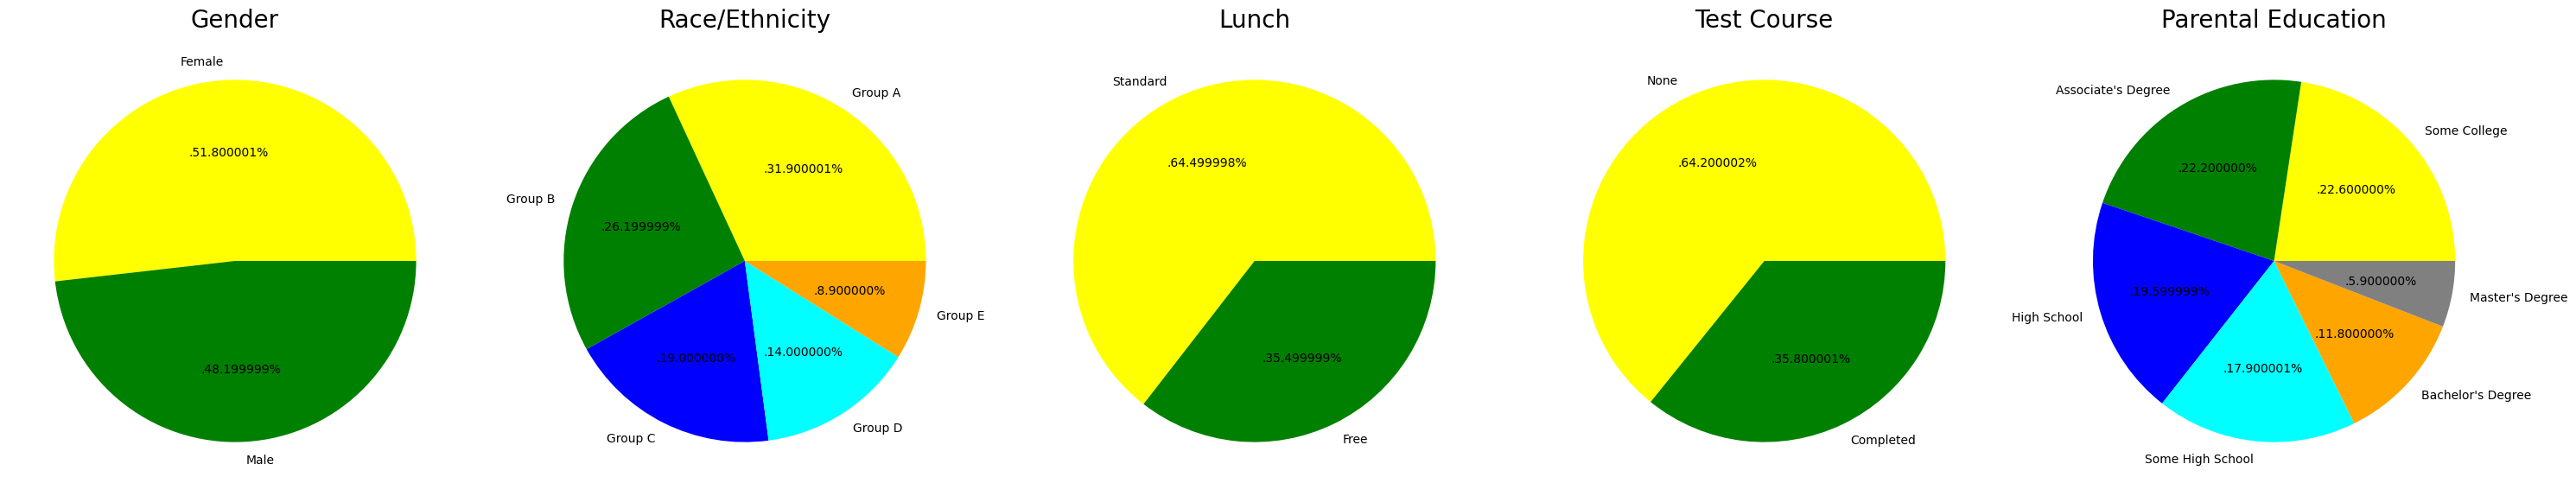

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
colors = ['yellow', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group A', 'Group B', 'Group C', 'Group D', 'Group E'
colors = ['yellow', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=colors, labels=labels, autopct='.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
colors = ['yellow', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
colors = ['yellow', 'green']

plt.pie(size, colors=colors, labels=labels, autopct='.%2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = "Some College", "Associate's Degree", "High School", "Some High School", "Bachelor's Degree", "Master's Degree"
colors = ['yellow', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors=colors, labels=labels, autopct='.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

Insights:
1. Number of Male and Female Students are almost equal.
2. Mostly students belongs to Race/Ethnicity of Group C.
3. Maximum number of students have standard lunch.
4. Most number of students have not enrolled in any test preparation course.
5. Number of students whose parental education is "Some College" is maximum followed by "Associate's Degree".

**4.4 Features Visualtion**

**4.4.1 *Gender Column***

1. How students are distributed w.r.t. Gender? -> Univariate Analysis

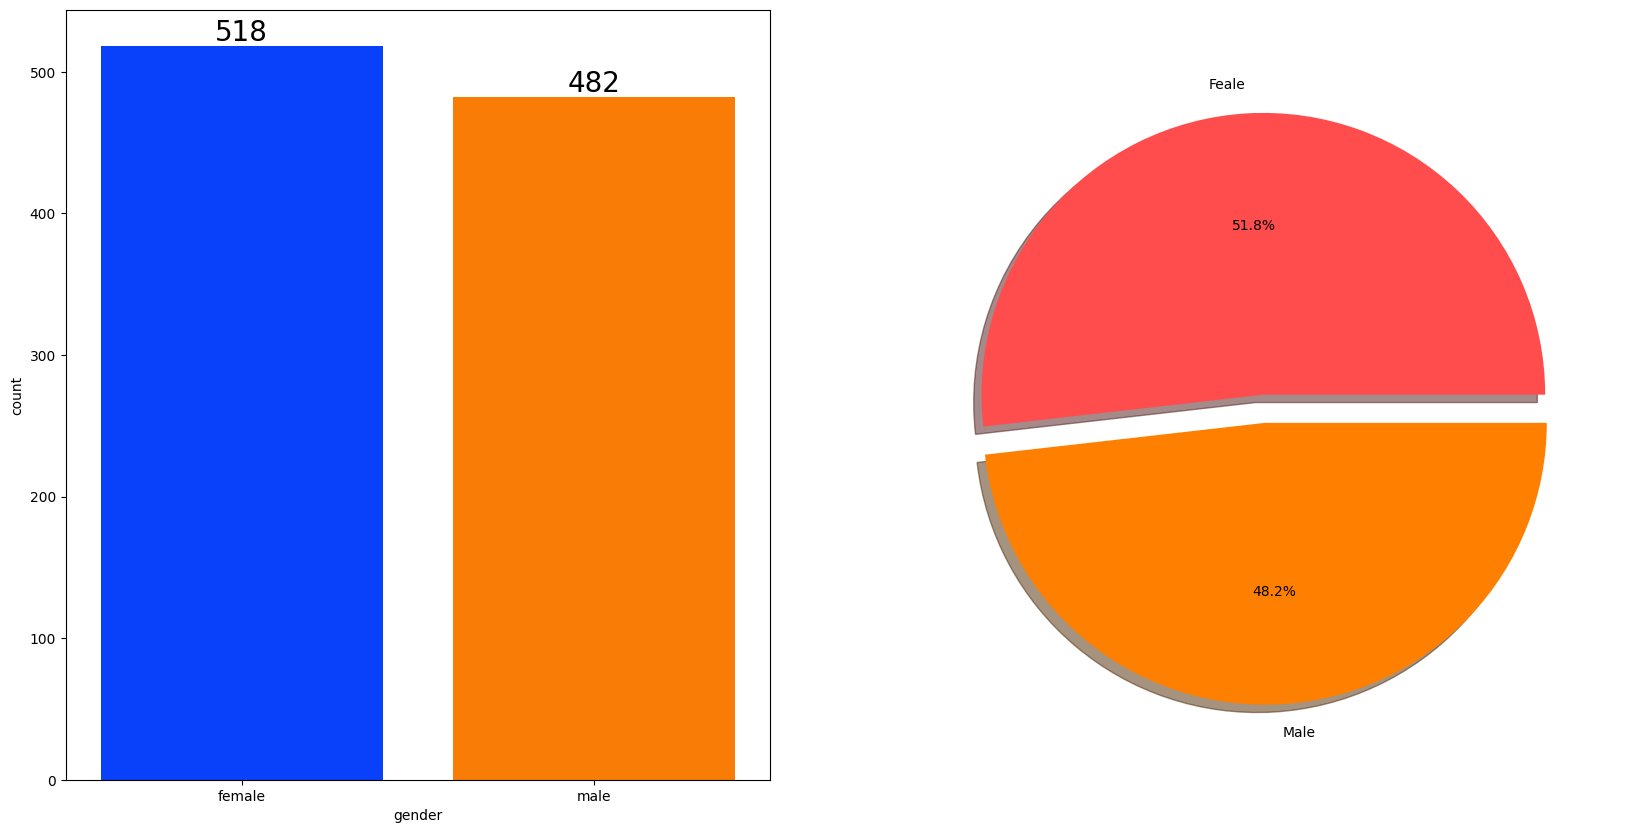

In [23]:
f,ax=plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['gender'], data=df, palette ='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
    
plt.pie(x=df['gender'].value_counts(), labels=['Feale', 'Male'], explode=[0,0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

Insights: 
Gender feature has balanced data with 518 female (52%) female students and 482 male students(48%).

Insights:
On an average,
1. females have better overall score than males.
2. males have scored higher in Maths.

**4.4.2 *Race/Ethnicity Column***

1. How are the values distributed w.r.t to each column? -> Univariate Analysis

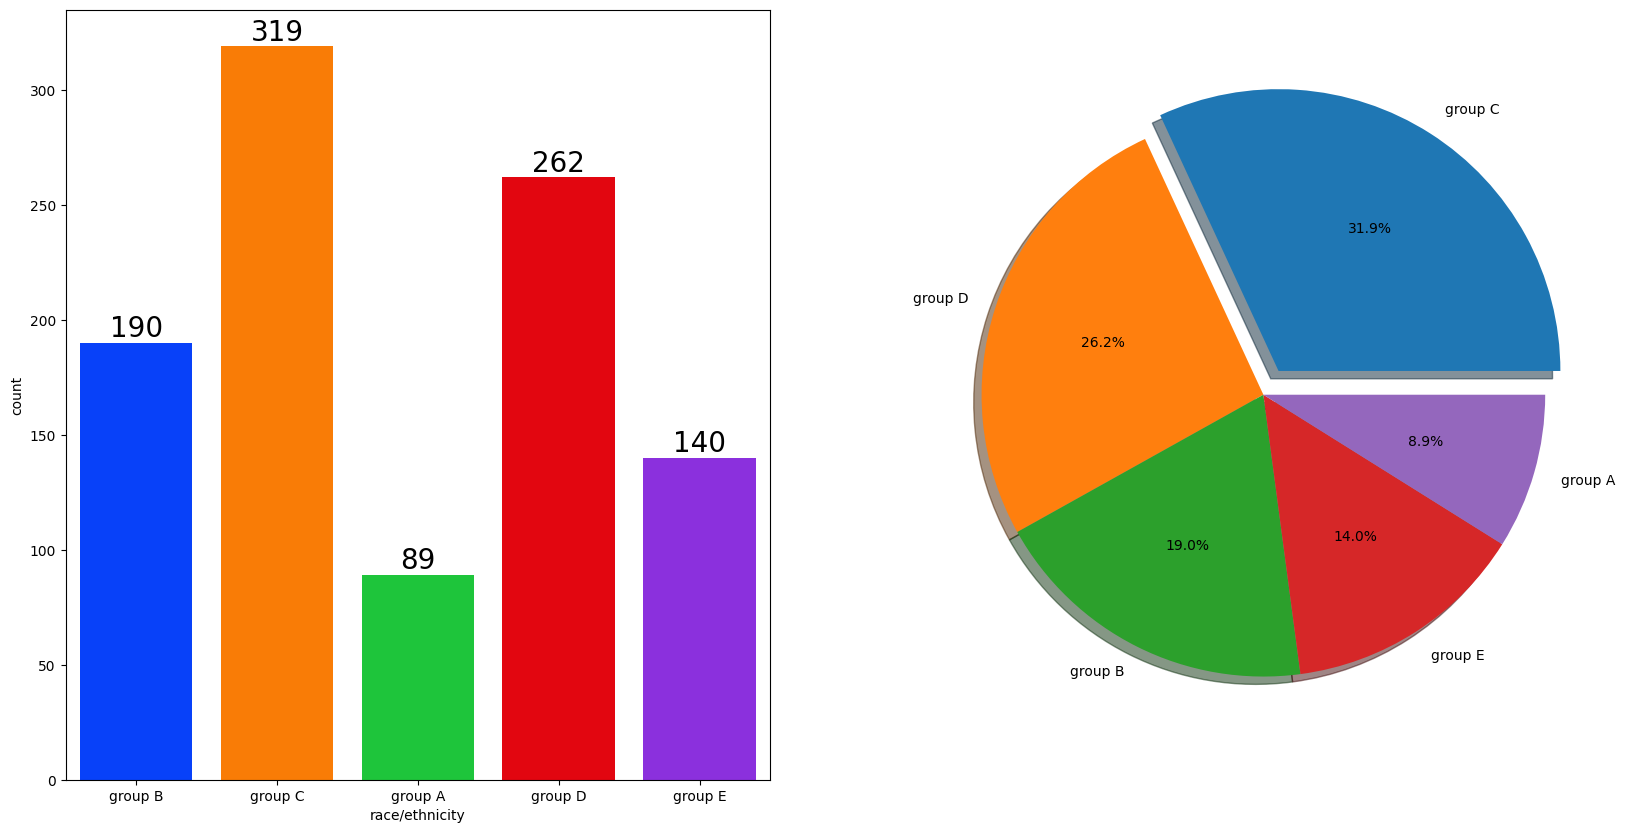

In [ ]:
figs, ax = plt.subplots(1, 2, figsize=(20, 10))
sns.countplot(x=df['race/ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

Insights:
1. Most of the students belong to Group C and Group D.
2. Least number of students belong to Group A.

2. Does Race/Ethnicity has any impact on student's performance? -> Bivariate Analysis

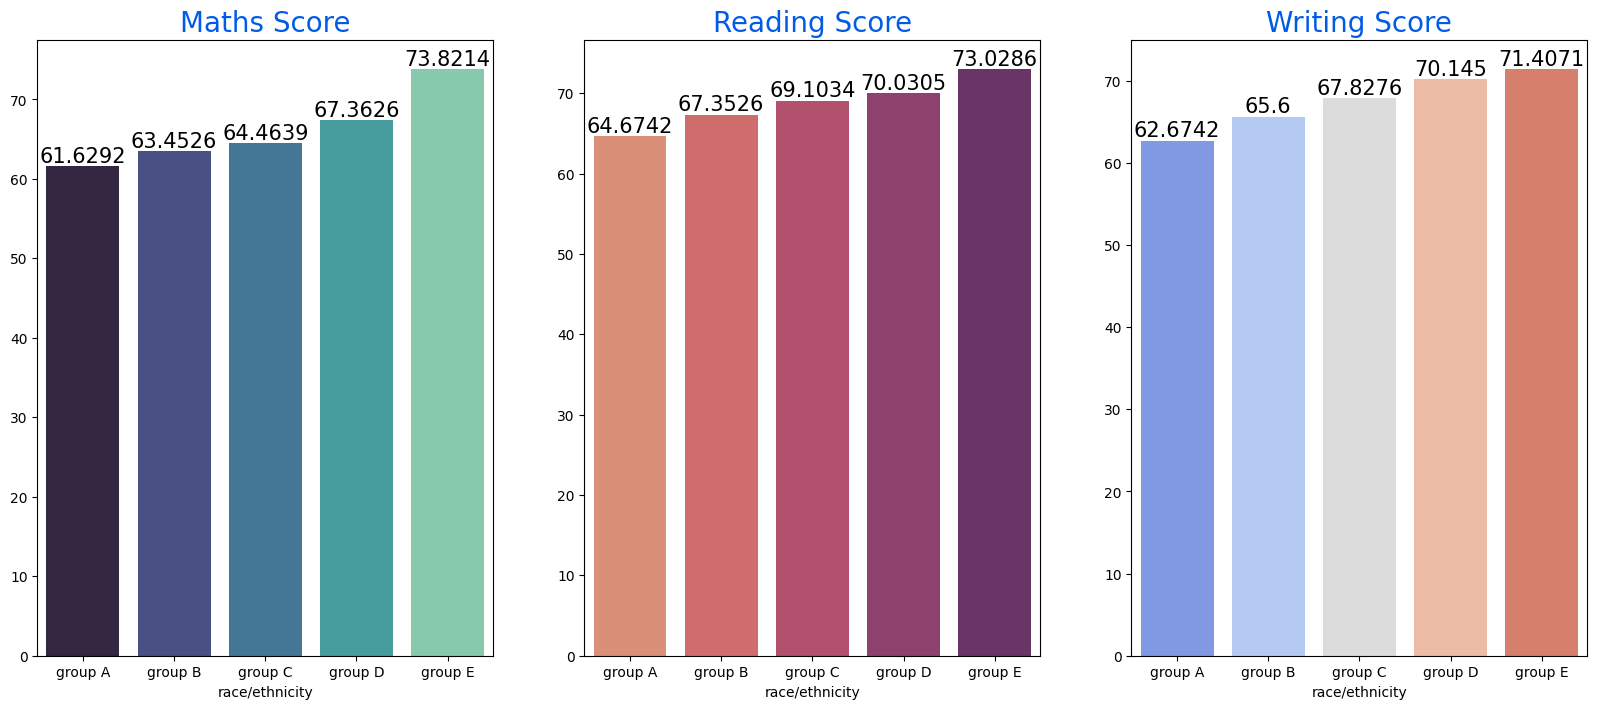

In [ ]:
group_data2 = df.groupby('race/ethnicity')
figs2, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=group_data2['math score'].mean().index, y=group_data2['math score'].mean().values, palette = 'mako', ax=ax[0])
ax[0].set_title('Maths Score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['reading score'].mean().index, y=group_data2['reading score'].mean().values, palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=group_data2['writing score'].mean().index, y=group_data2['writing score'].mean().values, palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

Insights:
1. Group E students have scored the highest marks.
2. Group A students have scored the lowest marks.
3. Students from a lower Socioeconomic status have a lower average in all course subjects.